In [13]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style("whitegrid")
sns.set_context("paper")


In [17]:
df = pd.read_csv('~/Downloads/Titanic.csv')
 
# View
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


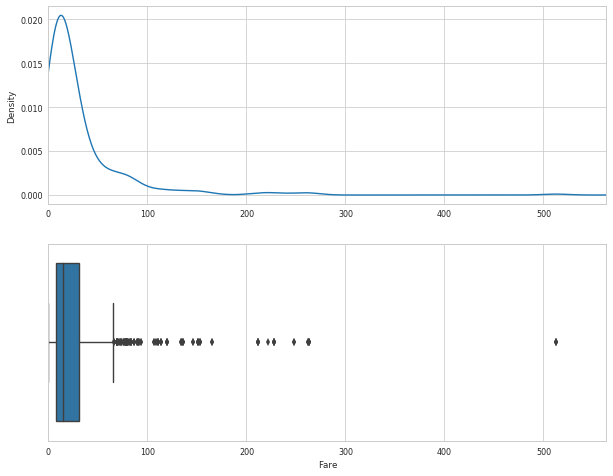

In [18]:
i = 'Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

In [19]:
# Remove any zeros (otherwise we get (-inf)
df.loc[df.Fare == 0, 'Fare'] = np.nan
 
# Drop NA
df.dropna(inplace=True)
 
# Log Transform

# Log Transform
df['Log_' + i] = np.log(df[i])

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


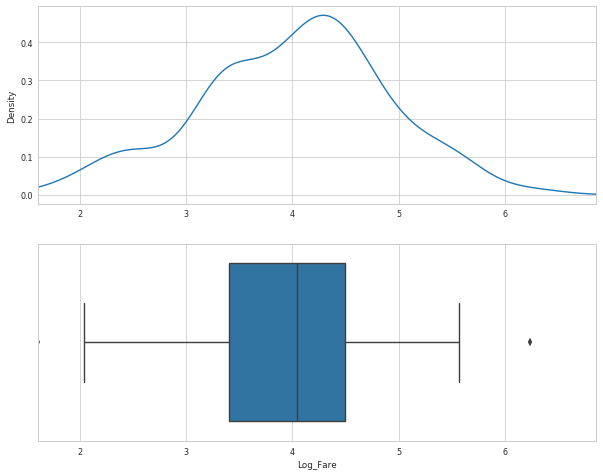

In [20]:
i = 'Log_Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

In [21]:

q75, q25 = np.percentile(df.Log_Fare.dropna(), [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)


/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


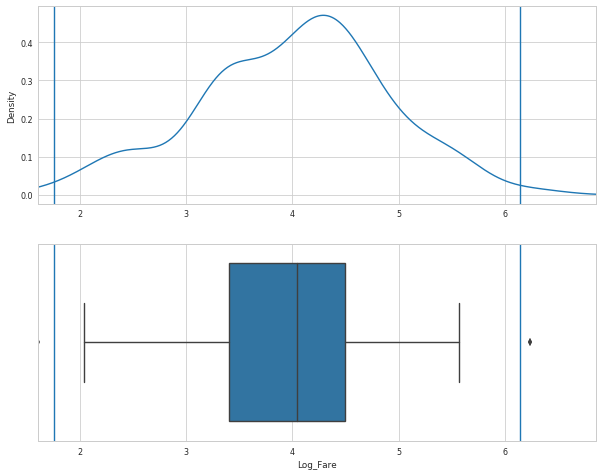

In [22]:
i = 'Log_Fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [23]:


df['Outlier'] = 0

df.loc[df[i] < min, 'Outlier'] = 1
df.loc[df[i] > max, 'Outlier'] = 1


In [14]:
ff_lon = 8 + 41 / 60
ff_lat = 50 + 7 / 60

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree(central_longitude=(to_lon + ff_lon) / 2))
ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='b', lw=2,
        transform=ccrs.PlateCarree())
ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='r', lw=2,
        transform=ccrs.Geodetic())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.gridlines()

NameError: name 'ccrs' is not defined

In [17]:
import json, urllib
from urllib import urlencode
import googlemaps

ImportError: cannot import name 'urlencode'

In [16]:
import json, urllib
from urllib import urlencode
import googlemaps
start = "Bridgewater, Sa, Australia"
finish = "Stirling, SA, Australia"

url = 'http://maps.googleapis.com/maps/api/directions/json?%s' % urlencode((
            ('origin', start),
            ('destination', finish)
 ))
ur = urllib.urlopen(url)
result = json.load(ur)

for i in range (0, len (result['routes'][0]['legs'][0]['steps'])):
    j = result['routes'][0]['legs'][0]['steps'][i]['html_instructions'] 
    print(j)

ImportError: cannot import name 'urlencode'

In [2]:
import os
import folium

print(folium.__version__)

0.5.0


In [3]:
import gpxpy

fname = os.path.join('data', '2014_08_05_farol.gpx')

gpx = gpxpy.parse(open(fname))

print('{} track(s)'.format(len(gpx.tracks)))
track = gpx.tracks[0]

print('{} segment(s)'.format(len(track.segments)))
segment = track.segments[0]

print('{} point(s)'.format(len(segment.points)))

1 track(s)
1 segment(s)
1027 point(s)


In [4]:
data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append(
        [
            point.longitude,
            point.latitude,
            point.elevation,
            point.time,
            segment.get_speed(point_idx)
        ]
    )

In [5]:

from pandas import DataFrame

columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
df = DataFrame(data, columns=columns)
df.head()

,Longitude,Latitude,Altitude,Time,Speed
0,-38.502595,-13.005390,10.9,2014-08-05 17:52:49,NaN
1,-38.502605,-13.005415,11.8,2014-08-05 17:52:49,2.138361
2,-38.502575,-13.005507,11.7,2014-08-05 17:52:54,2.792437
3,-38.502545,-13.005595,11.6,2014-08-05 17:52:57,3.388271
4,-38.502515,-13.005680,11.4,2014-08-05 17:53:00,3.107460


In [6]:
import numpy as np
from geographiclib.geodesic import Geodesic

angles = [90]
for i in range(len(df) - 1):
    info = Geodesic.WGS84.Inverse(
        df.iloc[i, 1], df.iloc[i, 0],
        df.iloc[i + 1, 1], df.iloc[i + 1, 0]
    )
    angles.append(info['azi2'])

# Change from CW-from-North to CCW-from-East.
angles = np.deg2rad(450 - np.array(angles))

# Normalize the speed to use as the length of the arrows.
r = df['Speed'] / df['Speed'].max()
df['u'] = r * np.cos(angles)
df['v'] = r * np.sin(angles)

In [7]:
import mplleaflet
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df = df.dropna()

# This style was lost below.
ax.plot(
    df['Longitude'],
    df['Latitude'],
    color='darkorange',
    linewidth=5,
    alpha=0.5
)

# This is preserved in the SVG icon.
sub = 10
kw = {'color': 'deepskyblue', 'alpha': 0.8, 'scale': 10}
ax.quiver(df['Longitude'][::sub],
          df['Latitude'][::sub],
          df['u'][::sub],
          df['v'][::sub], **kw)

gj = mplleaflet.fig_to_geojson(fig=fig)

In [9]:
import folium

lon, lat = -38.51386097, -13.00868051
zoom_start = 14

m = folium.Map(
    location=[lat, lon],
    tiles='Cartodb Positron',
    zoom_start=zoom_start
)

# The first geometry is a lineString.
line_string = gj['features'][0]
gjson = folium.features.GeoJson(line_string)

m.add_child(gjson)

m

In [10]:
line_string['properties']

{'color': '#FF8C00',
 'highlight': {},
 'opacity': 0.5,
 'style': {},
 'weight': 5.0}

In [11]:

from IPython.display import HTML

msg = '<font color="{}">This should be darkorange!</font>'.format
HTML(msg(line_string['properties']['color']))

In [13]:
m = folium.Map(
    location=[lat, lon],
    tiles='Cartodb Positron',
    zoom_start=zoom_start
)

icon_size = (14, 14)

for feature in gj['features']:
    if feature['geometry']['type'] == 'LineString':
        continue
    elif feature['geometry']['type'] == 'Point':
        lon, lat = feature['geometry']['coordinates']
        html = feature['properties']['html']

        icon_anchor = (feature['properties']['anchor_x'],
                       feature['properties']['anchor_y'])

        icon = folium.features.DivIcon(html=html,
                                       icon_size=(14, 14),
                                       icon_anchor=icon_anchor)
        marker = folium.map.Marker([lat, lon], icon=icon)
        m.add_child(marker)
    else:
        msg = 'Unexpected geometry {}'.format
        raise ValueError(msg(feature['geometry']))


m